<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/Barcelona_School_of_Economics_logo.svg/2560px-Barcelona_School_of_Economics_logo.svg.png" width="800" height="300">

# <b> Title TDB </b>


### <i> Group Members: Marta Sala, Soledad Monge, Maria Aleman Hernandez 
### <i> Master Thesis Project

#### <b>PROJECT SUMMARY:</b> 


<br>


#### <b>OBJECTIVE:</b>


<br>

#### <b>JUPYTER NOTEBOOK OUTLINE:</b>

1. [Load libraries](#step-1-load-libraries)
2. [Load data files & look at initial EDA](#step-2-load-data-files-and-initial-eda)
3. [Merge data](#step-3-merge-data)
4. [Handle missing values](#step-4-handle-missing-values)
5. [Explanatory data analysis](#step-5-exploratory-data-analysis)
6. [Feature Engineering](#step-6-feature-engineering)
7. [Create Model](#step-7-create-model)

<br>

## **STEP 1: LOAD LIBRARIES**
---

#### <b><i> Steps done in this section: </i>


1. Install packages and versions (if needed)


2. Import packages

### 1.1: Install packages and versions (if needed)

In [863]:
#!pip install pandas==2.2.2
#!pip install geopandas==1.0.1
#!pip install folium==0.19.5
#!pip install osmnx==2.0.1
#!pip install seaborn==0.13.2 
#!pip install matplotlib==3.8.4
#!pip install sklearn

### 1.2: Import the packages

In [864]:

import pandas as pd 
import numpy as np
import geopandas as gpd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import osmnx as ox
import folium
from folium import Choropleth
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

import warnings; warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', None)

## **STEP 2: LOAD DATA FILES AND INITIAL EDA**
---

#### <b><i>Data Files Descriptions:</i>
     
1. 'banks_location.xlsx'

- Description of file here - what it is about, what data it holds, an why is it important 
- List of relevant columns that are used 
<br>
<br>

2. 'business.xlsx'

- Description of file here - what it is about, what data it holds, an why is it important 
- List of relevant columns that are used 
<br>
<br>

3. 'sociodemographic.xlsx'

- Description of file here - what it is about, what data it holds, an why is it important 
- List of relevant columns that are used 
<br>
<br>

4. 'secciones_censales_sociodemo_2014.shp'

- Description of file here - what it is about, what data it holds, an why is it important 
- List of relevant columns that are used 
<br>
<br>

#### <b><i> Steps done in this section: </i>


1. Read excel files and transform to pandas dataframes


2. Look at first couple of rows for each df 


3. Look at initial EDA info for each df 

4. Remove columns from each df that will no be needed

#### 2.1

In [865]:
df_banklocations = pd.read_excel('banks_location.xlsx')
df_business = pd.read_excel('business.xlsx')
df_sociodemo = pd.read_excel('sociodemographic.xlsx')
census_map = gpd.read_file("geography data/secciones_censales_sociodemo_2014.shp")

#### 2.2

In [866]:
df_banklocations.head(5)

,PROVINCE,MUNICIPALITY,ENTITY,CUSEC,NUM_BRANCHES
0,MADRID,Ajalvir,CaixaBank,2807920120,1
1,MADRID,Ajalvir,Sabadell,2800201001,1
2,MADRID,Ajalvir,Santander,2800201001,1
3,MADRID,Alalpardo,CaixaBank,2816201002,1
4,MADRID,"Alamo, El",CaixaBank,2800401001,1


In [867]:
df_business.head(5)

,CUSEC,A_AgricultureLivestockForestryAndFishing_NumCompanies,B_ExtractiveIndustries_NumCompanies,C_ManufacturingIndustry_NumCompanies,D_ElectricityGasSteamAndAirConditioningSupply_NumCompanies,E_WaterSupplySanitationWasteManagementAndDecontaminationActivities_NumCompanies,F_Construction_NumCompanies,G_WholesaleAndRetailTradeRepairOfMotorVehiclesAndMotorcycles_NumCompanies,H_TransportationAndStorage_NumCompanies,I_Hospitality_NumCompanies,...,97_HouseholdActivitiesAsEmployersOfDomesticPersonnel_Between1000001And1500000_Billing,97_HouseholdActivitiesAsEmployersOfDomesticPersonnel_Between1500001And2500000_Billing,97_HouseholdActivitiesAsEmployersOfDomesticPersonnel_Between2500001And5000000_Billing,99_ActivitiesOfOrganizationsAndExtraterritorialBodies_Between1And250000_Billing,99_ActivitiesOfOrganizationsAndExtraterritorialBodies_Between250001And500000_Billing,99_ActivitiesOfOrganizationsAndExtraterritorialBodies_Between500001And1000000_Billing,99_ActivitiesOfOrganizationsAndExtraterritorialBodies_Between1500001And2500000_Billing,99_ActivitiesOfOrganizationsAndExtraterritorialBodies_Between2500001And5000000_Billing,total_NumCompanies,total_NumCompaniesNewCreation
0,800101001,1.0,0.0,73.0,2.0,3.0,64.0,121.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,510.0,26.0
1,800101002,1.0,0.0,73.0,2.0,3.0,64.0,121.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,510.0,26.0
2,800101003,1.0,0.0,73.0,2.0,3.0,64.0,121.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,510.0,26.0
3,800101004,1.0,0.0,73.0,2.0,3.0,64.0,121.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,510.0,26.0
4,800101005,1.0,0.0,73.0,2.0,3.0,64.0,121.0,38.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,510.0,26.0


In [868]:
df_sociodemo.head(5)

,CUSEC,codigo_postal,tasa_paro,tot_pob,v_varon,v_mujer,v_vp0004,v_vp0509,v_vp1014,v_vp1519,...,CUMUN,CSEC,CDIS,CMUN,CPRO,CCA,CUDIS,NPRO,NCA,NMUN
0,800101001,8630,0.087884,1516,751,765,20,32,45,44,...,8001,1,1,1,8,9,800101,Barcelona,Cataluña,Abrera
1,800101002,8630,0.073188,1833,915,918,34,53,62,59,...,8001,2,1,1,8,9,800101,Barcelona,Cataluña,Abrera
2,800101003,8630,0.106426,901,443,458,11,26,38,46,...,8001,3,1,1,8,9,800101,Barcelona,Cataluña,Abrera
3,800101004,8630,0.086092,1915,986,929,56,68,62,63,...,8001,4,1,1,8,9,800101,Barcelona,Cataluña,Abrera
4,800101005,8630,0.078972,1851,922,929,31,49,60,80,...,8001,5,1,1,8,9,800101,Barcelona,Cataluña,Abrera


In [869]:
census_map.head(5)

,id,sscc,geometry
0,5390,0810101017,"POLYGON ((2.11358 41.36561, 2.11098 41.36473, ..."
1,5391,0810101018,"POLYGON ((2.08795 41.36606, 2.08689 41.36559, ..."
2,5392,0810101019,"POLYGON ((2.10965 41.36047, 2.10939 41.36037, ..."
3,5393,0810101020,"POLYGON ((2.11214 41.36138, 2.11109 41.361, 2...."
4,5394,0810101021,"POLYGON ((2.11378 41.36196, 2.11333 41.36182, ..."


#### 2.3

In [870]:
# Print the shape and info of the dataframe
print(df_banklocations.shape)
print(df_banklocations.info())

(3082, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3082 entries, 0 to 3081
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PROVINCE      3082 non-null   object
 1   MUNICIPALITY  3082 non-null   object
 2   ENTITY        3082 non-null   object
 3   CUSEC         3082 non-null   int64 
 4   NUM_BRANCHES  3082 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 120.5+ KB
None


In [871]:
# Print the shape and info of the dataframe
print(df_business.shape)
print(df_business.info())

print("Business Columns:")
print(df_business.columns)

(9523, 1284)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9523 entries, 0 to 9522
Columns: 1284 entries, CUSEC to total_NumCompaniesNewCreation
dtypes: float64(1283), int64(1)
memory usage: 93.3 MB
None
Business Columns:
Index(['CUSEC', 'A_AgricultureLivestockForestryAndFishing_NumCompanies',
       'B_ExtractiveIndustries_NumCompanies',
       'C_ManufacturingIndustry_NumCompanies',
       'D_ElectricityGasSteamAndAirConditioningSupply_NumCompanies',
       'E_WaterSupplySanitationWasteManagementAndDecontaminationActivities_NumCompanies',
       'F_Construction_NumCompanies',
       'G_WholesaleAndRetailTradeRepairOfMotorVehiclesAndMotorcycles_NumCompanies',
       'H_TransportationAndStorage_NumCompanies', 'I_Hospitality_NumCompanies',
       ...
       '97_HouseholdActivitiesAsEmployersOfDomesticPersonnel_Between1000001And1500000_Billing',
       '97_HouseholdActivitiesAsEmployersOfDomesticPersonnel_Between1500001And2500000_Billing',
       '97_HouseholdActivitiesAsEmployersOfD

In [872]:
# Print the shape and info of the dataframe
print(df_sociodemo.shape)
print(df_sociodemo.info())

print("Socio Columns:")
print(df_sociodemo.columns)

(9523, 311)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9523 entries, 0 to 9522
Columns: 311 entries, CUSEC to NMUN
dtypes: float64(86), int64(221), object(4)
memory usage: 22.6+ MB
None
Socio Columns:
Index(['CUSEC', 'codigo_postal', 'tasa_paro', 'tot_pob', 'v_varon', 'v_mujer',
       'v_vp0004', 'v_vp0509', 'v_vp1014', 'v_vp1519',
       ...
       'CUMUN', 'CSEC', 'CDIS', 'CMUN', 'CPRO', 'CCA', 'CUDIS', 'NPRO', 'NCA',
       'NMUN'],
      dtype='object', length=311)


In [873]:
# Print the shape and info of the dataframe
print(census_map.shape)
print(census_map.info())

(35978, 3)
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35978 entries, 0 to 35977
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        35978 non-null  int64   
 1   sscc      35978 non-null  object  
 2   geometry  35978 non-null  geometry
dtypes: geometry(1), int64(1), object(1)
memory usage: 843.4+ KB
None


#### 2.4

In [874]:
# Filter wanted columns only for df_business
df_business = df_business[[
    "CUSEC",
    "A_AgricultureLivestockForestryAndFishing_NumCompanies", 
    "B_ExtractiveIndustries_NumCompanies",
    "C_ManufacturingIndustry_NumCompanies",
    "D_ElectricityGasSteamAndAirConditioningSupply_NumCompanies", 
    "E_WaterSupplySanitationWasteManagementAndDecontaminationActivities_NumCompanies",
    "F_Construction_NumCompanies",
    "G_WholesaleAndRetailTradeRepairOfMotorVehiclesAndMotorcycles_NumCompanies",
    "H_TransportationAndStorage_NumCompanies",
    "I_Hospitality_NumCompanies",
    "J_InformationAndCommunications_NumCompanies",
    "K_FinancialAndInsuranceActivities_NumCompanies",
    "L_RealEstateActivities_NumCompanies",
    "M_ProfessionalScientificAndTechnicalActivities_NumCompanies",
    "N_AdministrativeAndSupportServiceActivities_NumCompanies",
    "O_PublicAdministrationAndDefenseCompulsorySocialSecurity_NumCompanies",
    "P_Education_NumCompanies",
    "Q_HealthcareAndSocialServicesActivities_NumCompanies",
    "R_ArtsEntertainmentAndRecreationActivities_NumCompanies",
    "S_OtherServices_NumCompanies",
    "T_HouseholdActivitiesAsEmployersOfDomesticStaffHouseholdProductionOfGoodsAndServicesForOwnUse_NumCompanies",
    "U_ActivitiesOfExtraterrestrialOrganizations_NumCompanies",
    "A_AgricultureLivestockForestryAndFishing_NumCompaniesNewCreation",
    "B_ExtractiveIndustries_NumCompaniesNewCreation",
    "C_ManufacturingIndustry_NumCompaniesNewCreation",
    "D_ElectricityGasSteamAndAirConditioningSupply_NumCompaniesNewCreation",
    "E_WaterSupplySanitationWasteManagementAndDecontaminationActivities_NumCompaniesNewCreation",
    "F_Construction_NumCompaniesNewCreation",
    "G_WholesaleAndRetailTradeRepairOfMotorVehiclesAndMotorcycles_NumCompaniesNewCreation",
    "H_TransportationAndStorage_NumCompaniesNewCreation",
    "I_Hospitality_NumCompaniesNewCreation",
    "J_InformationAndCommunications_NumCompaniesNewCreation",
    "K_FinancialAndInsuranceActivities_NumCompaniesNewCreation",
    "L_RealEstateActivities_NumCompaniesNewCreation",
    "M_ProfessionalScientificAndTechnicalActivities_NumCompaniesNewCreation",
    "N_AdministrativeAndSupportServiceActivities_NumCompaniesNewCreation",
    "O_PublicAdministrationAndDefenseCompulsorySocialSecurity_NumCompaniesNewCreation",
    "P_Education_NumCompaniesNewCreation",
    "Q_HealthcareAndSocialServicesActivities_NumCompaniesNewCreation",
    "R_ArtsEntertainmentAndRecreationActivities_NumCompaniesNewCreation",
    "S_OtherServices_NumCompaniesNewCreation",
    "T_HouseholdActivitiesAsEmployersOfDomesticStaffHouseholdProductionOfGoodsAndServicesForOwnUse_NumCompaniesNewCreation",
    "Between0And100000_Profit",
    "Between100001And500000_Profit",
    "Between500001And1000000_Profit",
    "MoreThan1000000_Profit",
    "Negative_Profit",
    "Between1000001And1500000_Billing",
    "Between1500001And2500000_Billing",
    "Between1And250000_Billing",
    "Between25000001And50000000_Billing",
    "Between2500001And5000000_Billing",
    "Between250001And500000_Billing",
    "Between5000001And25000000_Billing",
    "Between500001And1000000_Billing",
    "MoreThan50000000_Billing",
    "total_NumCompanies",
    "total_NumCompaniesNewCreation"
]]

In [875]:
# Filter wanted columns only for df_sociodemo
df_sociodemo = df_sociodemo[[
    "CUSEC",
    "tasa_paro",
    "tot_pob",
    "v_varon",
    "v_mujer",
    "v_vp2024",
    "v_vp2529",
    "v_vp3034",
    "v_vp3539",
    "v_vp4044",
    "v_vp4549",
    "v_vp5054",
    "v_vp5559",
    "v_vp6064",
    "v_vp6569",
    "v_mp2024",
    "v_mp2529",
    "v_mp3034",
    "v_mp3539",
    "v_mp4044",
    "v_mp4549",
    "v_mp5054",
    "v_mp5559",
    "v_mp6064",
    "v_mp6569",
    "tot_espa",
    "tot_extra",
    "v_vESPANA",
    "v_vEXTR",
    "v_mESPANA",
    "v_mEXTR",
    "v_UE27",
    "v_nse0",
    "v_nse1",
    "v_nse2",
    "v_nse3",
    "v_nse4",
    "v_nse5",
    "v_nse6",
    "v_nse7",
    "v_nse8",
    "v_nse9",
    "nse",
    "v_psolter",
    "v_pcasado",
    "v_pviudo",
    "v_psepara",
    "v_pdivorc",
    "v_t_estu",
    "v_t_ocu",
    "v_t_p1em",
    "v_t_ptant",
    "v_t_pinv",
    "v_t_pvior",
    "v_t_pjub",
    "v_t_rctaho",
    "v_t_otrsit",
    "v_fuearm",
    "v_deyap",
    "v_tpcint",
    "v_tprda",
    "v_eadv",
    "v_tsrpp",
    "v_tcuap",
    "v_atcim",
    "v_oimm",
    "v_trcua",
    "v_emspr",
    "v_emnpr",
    "v_trcafoi",
    "v_trcaet",
    "v_otsayf",
    "v_otsmc",
    "v_agpA",
    "v_agpB",
    "v_induC",
    "v_induD",
    "v_induE",
    "v_consF",
    "v_servG",
    "v_servH",
    "v_servI",
    "v_servJ",
    "v_servK",
    "v_servL",
    "v_servM",
    "v_servN",
    "v_servO",
    "v_servP",
    "Renta_bruta_media_persona",
    "v_servQ",
    "tot_hog",
    "GMTotal",
    "Renta_bruta_media_hogar",
    "tot_viv",
    "v_ppctp",
    "v_ppcpp",
    "v_pphod",
    "v_alq",
    "v_cedgra",
    "v_oform",
    "v_propiedad",
    "v_m30",
    "v_30a45",
    "v_46a60",
    "v_61a75",
    "v_76a90",
    "v_91a105",
    "v_106a120",
    "v_121a150",
    "v_151a180",
    "v_181a300",
    "v_301a500",
    "v_m500",
    "codigo_postal",
    "precio_medio_m2",
    "provincia",
    "m2_provincia_BDE",
    "precio_medio_m2_provincia_BDE",
    "precio_medio_m2_provincia_webs",
    "n_hipotecas_provincia_BDE",
    "carga_hipoteca_provincia",
    "ltv_provincia_BDE",
    "ltv_ajustado_provincia"
]]

## **STEP 3: MERGE DATA**
---

The objective is to:
1. Understand where and why major banks like Santander, BBVA, etc., open branches.
2. Use that knowledge to identify high-potential CUSECs (census tracts) for new branch openings.
3. Present actionable insights using EDA and an interactive Tableau map.


---

### 1. `df_merge_model` — Includes sociodemographic, business, and bank location data

**Each row represents:** one CUSEC  
**Used for:**
- Exploratory Data Analysis (EDA)
- Descriptive statistics (income, business count, etc.)
- Visualizations in Tableau
- Scoring/predicting new areas for branch openings

**Why this structure?**
- Avoids duplicating CUSECs (which would skew distributions)
- Gives a clean and accurate view of each area

#### 3.1 Merging of Dataframes

In [876]:
# Normalize CUSEC
for df in [df_sociodemo, df_business, df_banklocations, census_map]:
    key = 'CUSEC' if 'CUSEC' in df.columns else 'sscc'
    df[key] = df[key].astype(str).str.zfill(10)
    
# Create df_merge_normal - merge socio-demographic and business datasets (one row per CUSEC)
df_merged_normal = df_sociodemo.merge(df_business, on='CUSEC')


## Clean df_bankslocations before merging ##
# Create list with only wanted bank names
relevant_banks = [
    'BANCO SANTANDER', 'Santander', 'CAIXABANK', 'CaixaBank', 'BANCO BILBAO VIZCAYA ARGENTARIA', 
    'BBVA', 'BANCO DE SABADELL', 'Sabadell', 'BANKINTER', 'Bankinter', 'SANTANDER', 'SABADELL'
]

# Filter to include only relevant bank branches
df_banklocations_copy = df_banklocations.copy()
df_banklocations_copy = df_banklocations_copy[df_banklocations_copy['ENTITY'].isin(relevant_banks)].reset_index()

# Create dictionary map for bank names
bank_map = {
    'BANCO SANTANDER' : 'SANTANDER', 
    'Santander' : 'SANTANDER',
    'SANTANDER' : 'SANTANDER',
    'CAIXABANK' : 'CAIXABANK',
    'CaixaBank' : 'CAIXABANK',
    'BANCO BILBAO VIZCAYA ARGENTARIA': 'BBVA',
    'BBVA' : 'BBVA',
    'Sabadell' : 'SABADELL',
    'SABADELL' : 'SABADELL',
    'BANCO DE SABADELL' : 'SABADELL', 
    'BANKINTER' : 'BANKINTER',
    'Bankinter' : 'BANKINTER',
}

# Map dictionary to column
df_banklocations_copy['ENTITY'] = df_banklocations_copy['ENTITY'].str.upper().str.strip()
df_banklocations_copy['ENTITY'] = df_banklocations_copy['ENTITY'].map(bank_map).fillna('OTHER')

# Aggregate actual NUM_BRANCHES per bank, per CUSEC
bank_counts = df_banklocations_copy.groupby(['CUSEC', 'ENTITY'])['NUM_BRANCHES'].sum().unstack(fill_value=0).reset_index()
# Add a total branch count column
bank_counts['NUM_BRANCHES'] = bank_counts.drop(columns='CUSEC').sum(axis=1)
df_bank_summary = bank_counts

# Extract unique CUSEC–Province–Municipality combinations
add_info = df_banklocations_copy.groupby('CUSEC')[['PROVINCE', 'MUNICIPALITY']].first().reset_index()
df_bank_summary = df_bank_summary.merge(add_info, on='CUSEC', how='left')


## Double check CUSEC codes in each df before merge ##
# Define valid province codes (Cataluña and Madrid)
target_provinces = ['08', '17', '25', '43', '28']
df_merged_normal['CUSEC'] = df_merged_normal['CUSEC'].astype(str).str.zfill(10)
df_bank_summary['CUSEC'] = df_bank_summary['CUSEC'].astype(str).str.zfill(10)

# Extract and filter by province code
df_merged_normal['province_code'] = df_merged_normal['CUSEC'].str[:2]
df_bank_summary['province_code'] = df_bank_summary['CUSEC'].str[:2]
df_merged_normal = df_merged_normal[df_merged_normal['province_code'].isin(target_provinces)]
df_bank_summary = df_bank_summary[df_bank_summary['province_code'].isin(target_provinces)]
df_merged_normal.drop(columns='province_code', inplace=True)
df_bank_summary.drop(columns='province_code', inplace=True)


## Create df_merged_model - one row per CUSEC with groups bank counts ##
# Outer is used due to 3 CUSECS in df_bank_summary not in df_merged_normal - this way all CUSECS are shown
df_merged_model = df_merged_normal.merge(df_bank_summary, on='CUSEC', how='left')

# Preview merged result
print(df_merged_model.shape)
print(df_merged_model.columns)

(9523, 189)
Index(['CUSEC', 'tasa_paro', 'tot_pob', 'v_varon', 'v_mujer', 'v_vp2024',
       'v_vp2529', 'v_vp3034', 'v_vp3539', 'v_vp4044',
       ...
       'total_NumCompanies', 'total_NumCompaniesNewCreation', 'BANKINTER',
       'BBVA', 'CAIXABANK', 'SABADELL', 'SANTANDER', 'NUM_BRANCHES',
       'PROVINCE', 'MUNICIPALITY'],
      dtype='object', length=189)


In [877]:
# Look at merged dataframe
df_merged_model.head(10)

,CUSEC,tasa_paro,tot_pob,v_varon,v_mujer,v_vp2024,v_vp2529,v_vp3034,v_vp3539,v_vp4044,...,total_NumCompanies,total_NumCompaniesNewCreation,BANKINTER,BBVA,CAIXABANK,SABADELL,SANTANDER,NUM_BRANCHES,PROVINCE,MUNICIPALITY
0,0800101001,0.087884,1516,751,765,39,38,45,40,57,...,510.0,26.0,0.0,0.0,1.0,1.0,0.0,2.0,BARCELONA,Abrera
1,0800101002,0.073188,1833,915,918,48,38,49,52,65,...,510.0,26.0,0.0,1.0,0.0,0.0,0.0,1.0,BARCELONA,Abrera
2,0800101003,0.106426,901,443,458,23,12,16,16,35,...,510.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0800101004,0.086092,1915,986,929,47,32,52,65,127,...,510.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0800101005,0.078972,1851,922,929,59,36,38,63,70,...,510.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0800101007,0.084445,2740,1405,1335,62,69,75,89,178,...,510.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0800101008,0.079723,1941,992,949,68,38,49,71,86,...,510.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0800201001,0.087735,287,154,133,6,6,4,5,13,...,63.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0800301002,0.052018,2517,1224,1293,67,66,52,76,96,...,719.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0800301003,0.054722,2232,1058,1174,59,41,45,48,79,...,719.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **STEP 4: HANDLE MISSING VALUES**
---

#### <b><i> Steps done in this section: </i>

1. The column `NUM_BRANCHES` has 7,384 missing values. Since the absence of competitor branches in a census section is meaningful (i.e., no banks are present), we did not drop these values. Instead, we decide to impute with `0`, indicating no competitor branches in that area. An imputation of 0 is also done for the newly created one-hot encoded columns of the 5 different competitors. 
<br> <br>


2. The column `MUNICIPALITY` has 7,384 entries. To fill in the missing values, we reference the CUSEC column specifically the third to the fifth digits of each CUSEC code in order to fill in the correct municipality. This is then repeated for all missing values in that column.   
<br> <br>


3. The column `PROVINCE` has 7,384 missing entries. However, the sociodemographic df has a `provincia` column with 0 missing values. The solution in this case is to delete the province column from bank locations df and use only the sociodemographic column.  
<br> <br>


4. A set of 325 census tracts have missing values in several `*_NumCompaniesNewCreation` columns (e.g., construction, retail, transportation). These columns represent the number of new businesses created by sector. Missing values were interpreted as no new businesses in that category and were imputed with `0`. All values were then cast to `int` for consistency. Same process was done for those columns that ended in `*_NumCompanies` as there were 25 missing values in each of these columns which were interpreted as no companies of that certain sector are based in that area and therefor imputed with `0`. 
<br> <br>


5. The missing values that belong to billing-related business columns end with `*_Billing`. These columns represent the estimated billing range for different sectors and have missing entries likely due to a lack of reported or available data for specific regions. For these columns, `stratified imputation` method is used in order to get the median value based on the specific province. 
<br> <br>


6. The column `precio_medio_m2` has 315 missing values. This column comes from the sociodemographic file which represents the average price per square meter. In order to fill in these values, a `stratified imputation` method is used where it groups by house sizes and imputes with the median value. 
<br> <br>



In [878]:
# Look at count of missing values (raw count)
df_merged_model.isna().sum()

CUSEC                                                                                                                       0
tasa_paro                                                                                                                   0
tot_pob                                                                                                                     0
v_varon                                                                                                                     0
v_mujer                                                                                                                     0
v_vp2024                                                                                                                    0
v_vp2529                                                                                                                    0
v_vp3034                                                                                                              

In [879]:
# Look at the missing values in percentage form 
missing_percent = df_merged_model.isnull().mean() * 100
missing_percent[missing_percent > 0].sort_values(ascending=False).head(50)

MUNICIPALITY                                                                                                             77.538591
PROVINCE                                                                                                                 77.538591
NUM_BRANCHES                                                                                                             77.538591
SANTANDER                                                                                                                77.538591
SABADELL                                                                                                                 77.538591
CAIXABANK                                                                                                                77.538591
BBVA                                                                                                                     77.538591
BANKINTER                                                                          

**Comment 1 - Dealing with `NUM_BRANCHES` plus the `5 branches encoded columns` missing values**

In [880]:
# Impute the missing values with 0s
cols_to_fill = ['NUM_BRANCHES', 'SANTANDER', 'SABADELL', 'CAIXABANK', 'BBVA', 'BANKINTER']
df_merged_model[cols_to_fill] = df_merged_model[cols_to_fill].fillna(0).astype(int)

In [881]:
# Double check
print(df_merged_model['NUM_BRANCHES'].isnull().sum())
print(df_merged_model['BBVA'].isnull().sum())

0
0


**Comment 2 - Dealing `MUNICIPALITY` missing values**

In [882]:
# Create a new column with municipality code (digits 3 to 5 from CUSEC)
df_merged_model['municipality_code'] = df_merged_model['CUSEC'].str[2:5]

# Load the INE dictionary source file
# Website : https://www.ine.es/ 
df_ine = pd.read_excel(r"/Users/mariaaleman/Documents/VScode_T3/Thesis/municipality_map_dict.xlsx", dtype=str, header=1)

# Standardize codes
df_ine['province_code'] = df_ine['CPRO'].str.zfill(2)
df_ine['municipality_code'] = df_ine['CMUN'].str.zfill(3)
df_ine['full_code'] = df_ine['province_code'] + df_ine['municipality_code']

# Build the dictionary
municipality_lookup = dict(zip(df_ine['full_code'], df_ine['NOMBRE']))

# Create new province + municipality code for merged df
df_merged_model['full_code'] = df_merged_model['CUSEC'].str[0:2] + df_merged_model['municipality_code']

# This fully replaces with official INE name
df_merged_model['MUNICIPALITY'] = df_merged_model['full_code'].map(municipality_lookup)

In [883]:
df_merged_model[['MUNICIPALITY']].isnull().sum()

MUNICIPALITY    0
dtype: int64

**Comment 3 - Dealing with `PROVINCE` missing values**

In [884]:
# Fill missing 'provincia' values using corresponding values from 'PROVINCE'
df_merged_model.loc[df_merged_model['provincia'].isnull(), 'provincia'] = \
    df_merged_model.loc[df_merged_model['provincia'].isnull(), 'PROVINCE']

# Drop the original 'PROVINCE' column
df_merged_model.drop(columns=['PROVINCE'], inplace=True)

# Rename 'provincia' to 'PROVINCE'
df_merged_model.rename(columns={'provincia': 'PROVINCE'}, inplace=True)

In [885]:
df_merged_model['PROVINCE'].isnull().sum()

0

**Comment 4 - Dealing with `NumCompaniesNewCreation` and `NumCompanies` missing values**

In [886]:
# Create list of all new creation columns
new_creation_cols = [col for col in df_merged_model.columns if 'NumCompaniesNewCreation' in col]

# Cast all values to 'int' for consistency
df_merged_model[new_creation_cols] = df_merged_model[new_creation_cols].fillna(0).astype(int)

In [887]:
df_merged_model[new_creation_cols].isnull().sum()

A_AgricultureLivestockForestryAndFishing_NumCompaniesNewCreation                                                         0
B_ExtractiveIndustries_NumCompaniesNewCreation                                                                           0
C_ManufacturingIndustry_NumCompaniesNewCreation                                                                          0
D_ElectricityGasSteamAndAirConditioningSupply_NumCompaniesNewCreation                                                    0
E_WaterSupplySanitationWasteManagementAndDecontaminationActivities_NumCompaniesNewCreation                               0
F_Construction_NumCompaniesNewCreation                                                                                   0
G_WholesaleAndRetailTradeRepairOfMotorVehiclesAndMotorcycles_NumCompaniesNewCreation                                     0
H_TransportationAndStorage_NumCompaniesNewCreation                                                                       0
I_Hospitality_Nu

In [888]:
# Create list of all num companies columns
num_companies_cols = [col for col in df_merged_model.columns if 'NumCompanies' in col]

# Cast all values to 'int' for consistency
df_merged_model[num_companies_cols] = df_merged_model[num_companies_cols].fillna(0).astype(int)

In [889]:
df_merged_model[num_companies_cols].isnull().sum()

A_AgricultureLivestockForestryAndFishing_NumCompanies                                                                    0
B_ExtractiveIndustries_NumCompanies                                                                                      0
C_ManufacturingIndustry_NumCompanies                                                                                     0
D_ElectricityGasSteamAndAirConditioningSupply_NumCompanies                                                               0
E_WaterSupplySanitationWasteManagementAndDecontaminationActivities_NumCompanies                                          0
F_Construction_NumCompanies                                                                                              0
G_WholesaleAndRetailTradeRepairOfMotorVehiclesAndMotorcycles_NumCompanies                                                0
H_TransportationAndStorage_NumCompanies                                                                                  0
I_Hospitality_Nu

**Comment 5 - Dealing with `Billing` and `Profit` missing values**

In [890]:
# Do stratified imputation with median 
billing_cols = [col for col in df_merged_model.columns if 'Billing' in col]
prov_medians = df_merged_model.groupby("PROVINCE")[billing_cols].transform(lambda x: x.fillna(x.median()))
df_merged_model[billing_cols] = prov_medians.fillna(df_merged_model[billing_cols].median())

In [891]:
df_merged_model[billing_cols].isnull().sum()

Between1000001And1500000_Billing      0
Between1500001And2500000_Billing      0
Between1And250000_Billing             0
Between25000001And50000000_Billing    0
Between2500001And5000000_Billing      0
Between250001And500000_Billing        0
Between5000001And25000000_Billing     0
Between500001And1000000_Billing       0
MoreThan50000000_Billing              0
dtype: int64

In [892]:
# Do stratified imputation with median 
profit_cols = [col for col in df_merged_model.columns if 'Profit' in col]
profit_medians = df_merged_model.groupby("PROVINCE")[profit_cols].transform(lambda x: x.fillna(x.median()))
df_merged_model[profit_cols] = profit_medians.fillna(df_merged_model[profit_cols].median())

In [893]:
df_merged_model[profit_cols].isnull().sum()

Between0And100000_Profit          0
Between100001And500000_Profit     0
Between500001And1000000_Profit    0
MoreThan1000000_Profit            0
Negative_Profit                   0
dtype: int64

**Comment 6 - Dealing with `Precio_medio` missing values**

In [894]:
# Create list of house sizes
house_size_cols = ['v_m30', 'v_30a45', 'v_46a60', 'v_61a75', 'v_76a90', 'v_91a105', 'v_106a120', 'v_121a150', 'v_151a180','v_181a300', 'v_301a500', 'v_m500']

# Create new column with the most represented house size label
df_merged_model['house_size_group'] = df_merged_model[house_size_cols].idxmax(axis=1)

# Impute using house size group
df_merged_model['precio_medio_m2'] = df_merged_model.groupby('house_size_group')['precio_medio_m2'].transform(lambda x: x.fillna(x.median()))

# Fallback to MUNICIPALITY
df_merged_model['precio_medio_m2'] = df_merged_model.groupby('MUNICIPALITY')['precio_medio_m2'].transform(lambda x: x.fillna(x.median()))

# Fallback to global median
df_merged_model['precio_medio_m2'] = df_merged_model['precio_medio_m2'].fillna(df_merged_model['precio_medio_m2'].median())

# Drop house_size_group
df_merged_model = df_merged_model.drop(columns='house_size_group')

In [895]:
df_merged_model['precio_medio_m2'].isnull().sum()

0

In [896]:
# Double check no more missing data for all columns
df_merged_model.isna().sum()

CUSEC                                                                                                                    0
tasa_paro                                                                                                                0
tot_pob                                                                                                                  0
v_varon                                                                                                                  0
v_mujer                                                                                                                  0
v_vp2024                                                                                                                 0
v_vp2529                                                                                                                 0
v_vp3034                                                                                                                 0
v_vp3539        

## **STEP 5: EXPLORATORY DATA ANALYSIS**
---

#### <b><i> Steps done in this section: </i>


1. EDA on merged df


2. Correlations Insights

### 5.1 Initial EDA on merged df

In [897]:
# Define unique DISTRICT ID: Province + Municipality + District
df_merged_model['DISTRICT'] = (
    df_merged_model['CUSEC'].str[:2] + "_" +   # Province
    df_merged_model['CUSEC'].str[2:5] + "_" +  # Municipality
    df_merged_model['CUSEC'].str[5:7]          # District
)

In [898]:
# Update PROVINCE column to only include Cataluña and Madrid
df_merged_model['PROVINCE'] = df_merged_model['PROVINCE'].replace({'Barcelona': 'Cataluna', 'BARCELONA': 'Cataluna',
                                                                   'Girona': 'Cataluna', 'GIRONA': 'Cataluna', 
                                                                   'Lleida': 'Cataluna', 'LLEIDA': 'Cataluna', 
                                                                   'Tarragona': 'Cataluna', 'TARRAGONA': 'Cataluna', 
                                                                   'MADRID': 'Madrid', 'Madrid': 'Madrid'})

Comment : 


These histograms provide an initial overview of business and banking presence across geographical areas and guide us toward deeper insights using correlation analysis and spatial visualization.

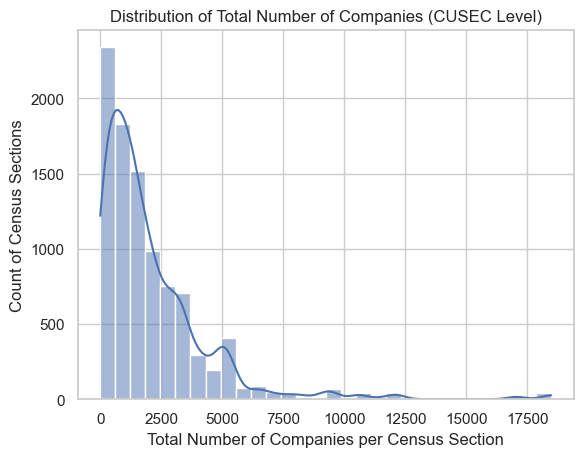

In [899]:
# Histogram for total companies at CUSEC (Census Section) level
sns.histplot(df_merged_model['total_NumCompanies'], bins=30, kde=True)
plt.title("Distribution of Total Number of Companies (CUSEC Level)")
plt.xlabel("Total Number of Companies per Census Section")
plt.ylabel("Count of Census Sections")
plt.show()

**Distribution of Total Number of Companies**
- The distribution is **right-skewed**, indicating that most census sections have a **relatively small number** of companies.
- A few sections have a **very high concentration of businesses**, creating a **long tail** in the distribution.
- This suggests business activity is **unevenly distributed** and might benefit from **log transformation** during further analysis.

In [900]:
df_merged_model['MUNICIPALITY'].nunique()

1125

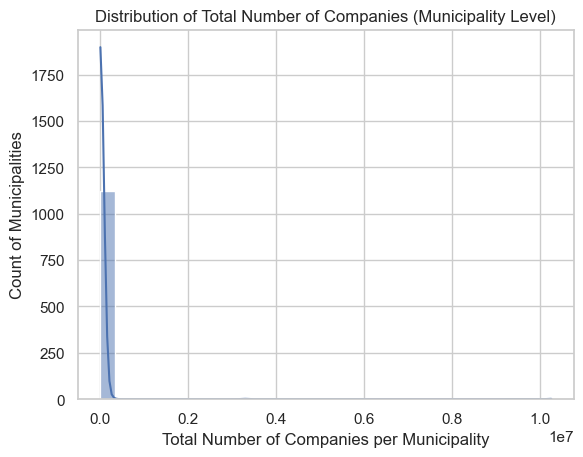

In [901]:
# Aggregate total number of companies by MUNICIPALITY
companies_by_muni = df_merged_model.groupby('MUNICIPALITY')['total_NumCompanies'].sum().reset_index()

# Plot histogram for MUNICIPALITY level
sns.histplot(companies_by_muni['total_NumCompanies'], bins=30, kde=True)
plt.title("Distribution of Total Number of Companies (Municipality Level)")
plt.xlabel("Total Number of Companies per Municipality")
plt.ylabel("Count of Municipalities")
plt.show()

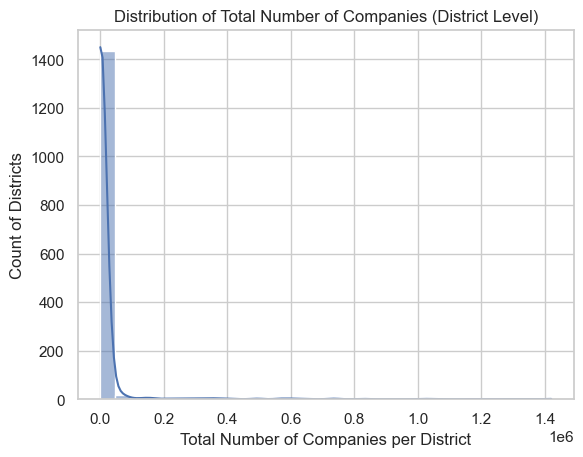

In [902]:
# Aggregate total number of companies by DISTRICT
companies_by_district = df_merged_model.groupby('DISTRICT')['total_NumCompanies'].sum().reset_index()

# Plot histogram for DISTRICT level
sns.histplot(companies_by_district['total_NumCompanies'], bins=30, kde=True)
plt.title("Distribution of Total Number of Companies (District Level)")
plt.xlabel("Total Number of Companies per District")
plt.ylabel("Count of Districts")
plt.show()

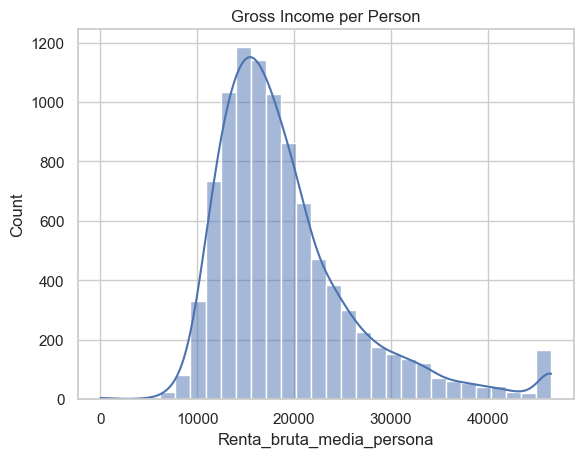

In [903]:
sns.histplot(df_merged_model['Renta_bruta_media_persona'],bins=30, kde=True)
plt.title('Gross Income per Person')
plt.show()

**Distribution of Gross Income per Person**
- The histogram shows the distribution of **Gross Income per Person** across census sections.
- **Right-skewed distribution**: Majority falls between **12,000 - 25,000**.
- A **secondary peak** around **45,000-50,000** suggests affluent areas.
- The **KDE curve** smooths the density estimate, highlighting the shape of the distribution.

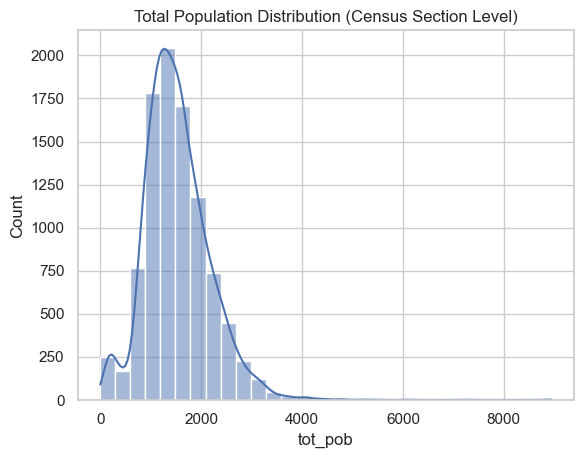

In [904]:
sns.histplot(df_merged_model['tot_pob'], bins=30, kde=True)
plt.title('Total Population Distribution (Census Section Level)')
plt.show()

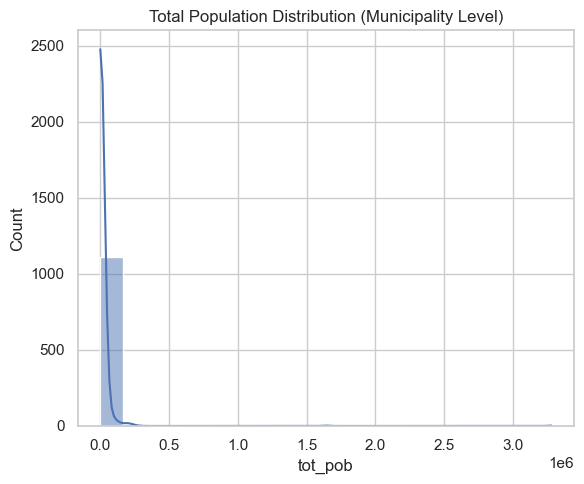

In [905]:
pop_by_muni = df_merged_model.groupby('MUNICIPALITY')['tot_pob'].sum().reset_index()

plt.figure(figsize=(6,5))
sns.histplot(pop_by_muni['tot_pob'], bins=20, kde=True)
plt.title('Total Population Distribution (Municipality Level)')
plt.xlabel('tot_pob')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

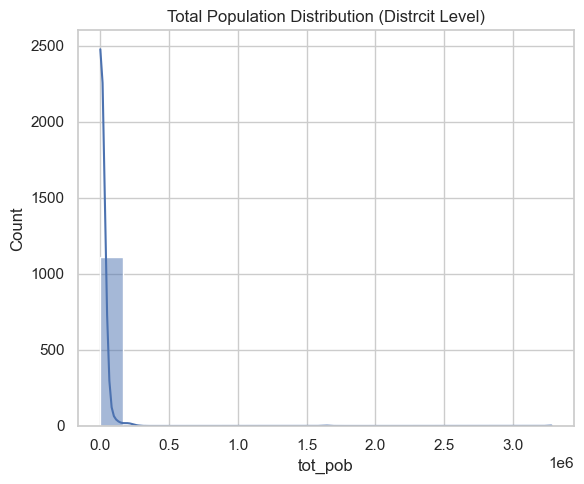

In [906]:
pop_by_district = df_merged_model.groupby('DISTRICT')['tot_pob'].sum().reset_index()

plt.figure(figsize=(6,5))
sns.histplot(pop_by_muni['tot_pob'], bins=20, kde=True)
plt.title('Total Population Distribution (Distrcit Level)')
plt.xlabel('tot_pob')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [907]:
num_districts = df_merged_model['DISTRICT'].nunique()
print(f"Number of unique districts: {num_districts}")

Number of unique districts: 1485


**Renaming column names**

The original sector column names are lengthy and difficult to interpret in plots and analyses (e.g., `G_WholesaleAndRetailTradeRepairOfMotorVehiclesAndMotorcycles_NumCompaniesNewCreation`).  
To improve readability and make the EDA and visualization outputs more interpretable, we rename these columns to shorter, human-friendly labels (e.g., `Wholesale & Retail`).

In [908]:
# Create a mapping from long names to simplified ones
rename_dict = {
    'A_AgricultureLivestockForestryAndFishing_NumCompaniesNewCreation': 'Agriculture',
    'B_ExtractiveIndustries_NumCompaniesNewCreation': 'Extractive',
    'C_ManufacturingIndustry_NumCompaniesNewCreation': 'Manufacturing',
    'D_ElectricityGasSteamAndAirConditioningSupply_NumCompaniesNewCreation': 'Energy',
    'E_WaterSupplySanitationWasteManagementAndDecontaminationActivities_NumCompaniesNewCreation': 'Water & Waste',
    'F_Construction_NumCompaniesNewCreation': 'Construction',
    'G_WholesaleAndRetailTradeRepairOfMotorVehiclesAndMotorcycles_NumCompaniesNewCreation': 'Wholesale & Retail',
    'H_TransportationAndStorage_NumCompaniesNewCreation': 'Transport',
    'I_Hospitality_NumCompaniesNewCreation': 'Hospitality',
    'J_InformationAndCommunications_NumCompaniesNewCreation': 'Info & Comms',
    'K_FinancialAndInsuranceActivities_NumCompaniesNewCreation': 'Finance',
    'L_RealEstateActivities_NumCompaniesNewCreation': 'Real Estate',
    'M_ProfessionalScientificAndTechnicalActivities_NumCompaniesNewCreation': 'Professional Services',
    'N_AdministrativeAndSupportServiceActivities_NumCompaniesNewCreation': 'Admin Services',
    'O_PublicAdministrationAndDefenseCompulsorySocialSecurity_NumCompaniesNewCreation': 'Public Admin',
    'P_Education_NumCompaniesNewCreation': 'Education',
    'Q_HealthcareAndSocialServicesActivities_NumCompaniesNewCreation': 'Health & Social',
    'R_ArtsEntertainmentAndRecreationActivities_NumCompaniesNewCreation': 'Arts & Recreation',
    'S_OtherServices_NumCompaniesNewCreation': 'Other Services',
    'T_HouseholdActivitiesAsEmployersOfDomesticStaffHouseholdProductionOfGoodsAndServicesForOwnUse_NumCompaniesNewCreation': 'Household Services',
    'total_NumCompaniesNewCreation': 'Total Companies'
}

# Apply renaming
df_merged_model.rename(columns=rename_dict, inplace=True)

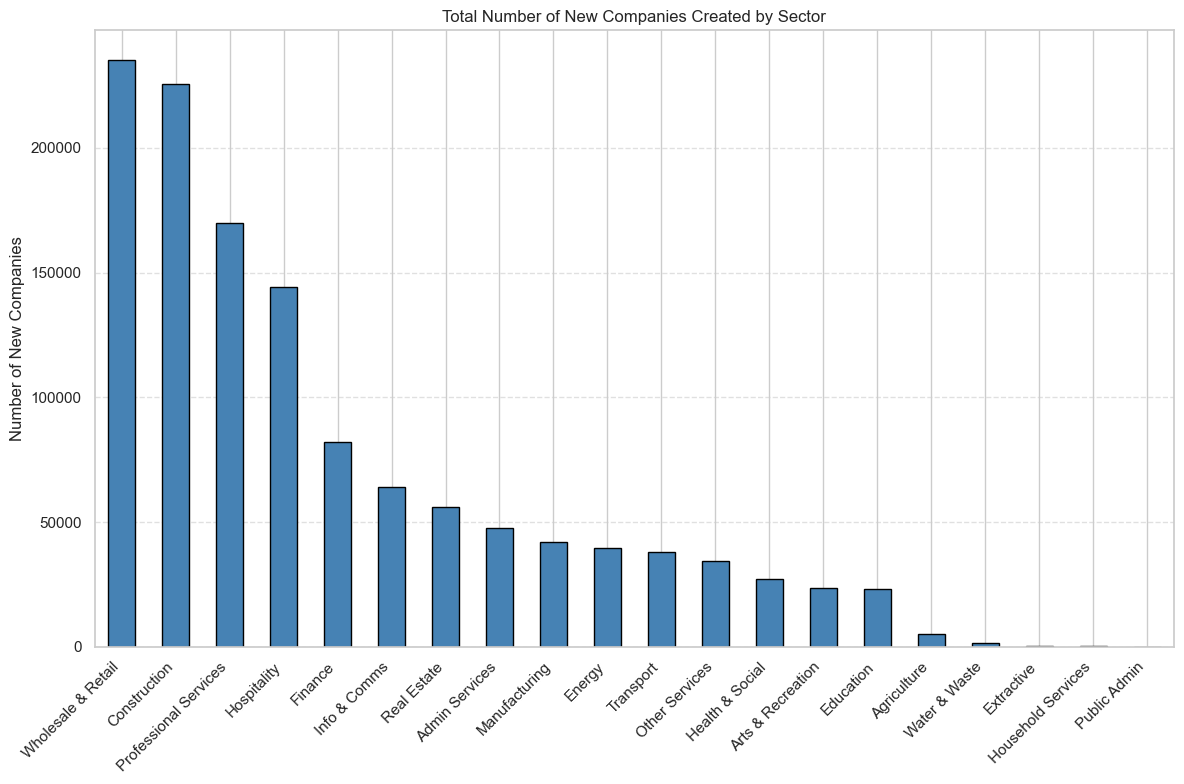

In [909]:
# Get relevant columns
new_company_cols = [col for col in df_merged_model.columns if col in rename_dict.values()]

# Compute totals
sector_totals = df_merged_model[new_company_cols].sum().sort_values(ascending=False)

# Filter out 'Total Companies'
sector_totals = sector_totals[sector_totals.index != 'Total Companies']

plt.figure(figsize=(12, 8))
sector_totals.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Total Number of New Companies Created by Sector')
plt.ylabel('Number of New Companies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

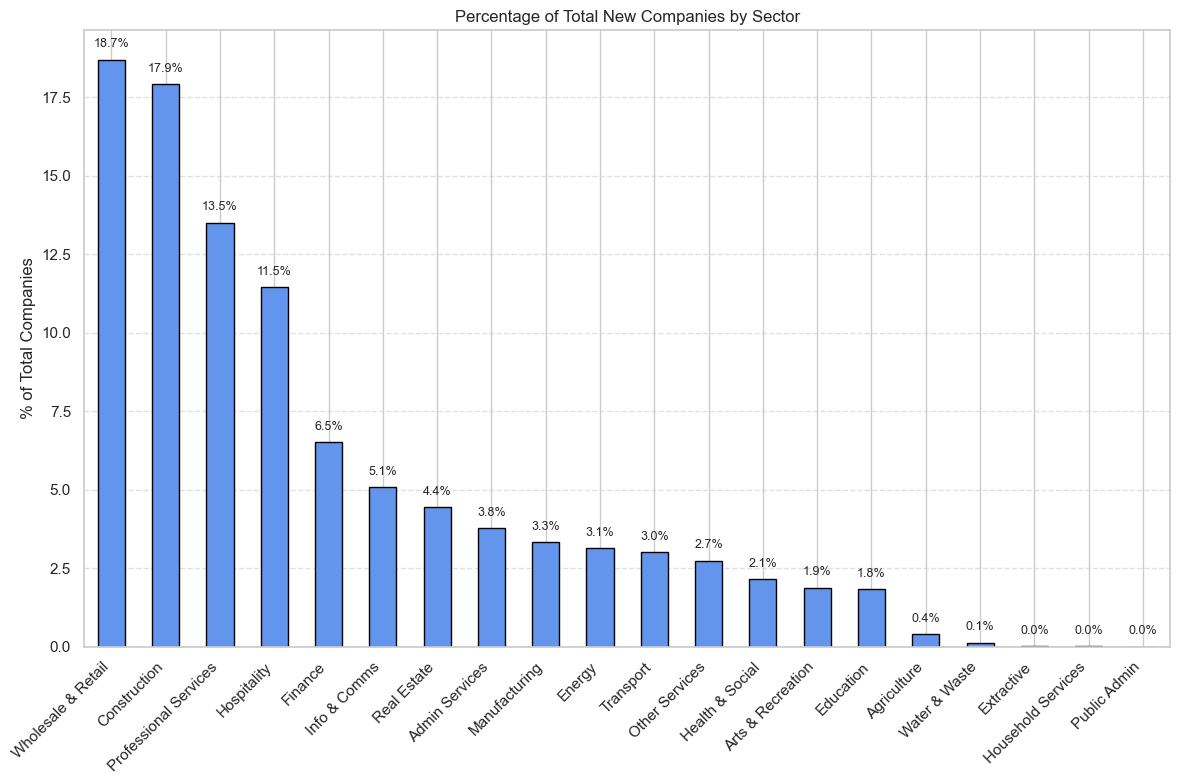

In [910]:
# Get relevant columns (already renamed)
new_company_cols = [col for col in df_merged_model.columns if col in rename_dict.values()]

# Compute total new companies per sector
sector_totals = df_merged_model[new_company_cols].sum().sort_values(ascending=False)

# Remove 'Total Companies' if it exists
sector_totals = sector_totals[sector_totals.index != 'Total Companies']

# Compute percentage
sector_percent = (sector_totals / sector_totals.sum()) * 100

plt.figure(figsize=(12, 8))
bars = sector_percent.plot(kind='bar', color='cornflowerblue', edgecolor='black')

plt.title('Percentage of Total New Companies by Sector')
plt.ylabel('% of Total Companies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add percentage labels on top
for i, val in enumerate(sector_percent):
    plt.text(i, val + 0.3, f'{val:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

**Top Sectors for New Company Formation**

The top contributors to new company formation are:

- **Wholesale & Retail** (18.7%)  
- **Construction** (17.9%)  
- **Professional Services** (13.5%)  
- **Hospitality** (11.5%)  

Together, these four sectors account for **a little over 60% of all new company creations**, underscoring their dominant role in shaping the economic landscape.

### 5.2: Correlation insights


**Objective**

The goal of this analysis is to understand the relationship between the number of bank branches (`NUM_BRANCHES`) and the presence or creation of companies across various economic sectors. Specifically, we want to identify which types of company activity correlate most strongly with bank branch density, as this may reveal strategic placement patterns and help inform future expansion plans.


**Step-by-Step Plan**


2. **Select all company-related columns**, particularly those containing `"_NumCompanies"`.
3. **Aggregate the data by `DISTRICT`** using `sum()` to consolidate values.
4. **Compute the correlation** between the number of bank branches and company activity by sector.


In [911]:
# Create list of new sectors 
new_sector_cols = [
    'Agriculture',
    'Extractive',
    'Manufacturing',
    'Energy',
    'Water & Waste',
    'Construction',
    'Wholesale & Retail',
    'Transport',
    'Hospitality',
    'Info & Comms',
    'Finance',
    'Real Estate',
    'Professional Services',
    'Admin Services',
    'Public Admin',
    'Education',
    'Health & Social',
    'Arts & Recreation',
    'Other Services',
    'Household Services'
]

# Include NUM_BRANCHES in the correlation set
correlation_cols = new_sector_cols + ['NUM_BRANCHES']
aggregation_level = 'DISTRICT'

# Aggregate at the district level
aggregated_df = (
    df_merged_model[correlation_cols + [aggregation_level]]
    .groupby(aggregation_level)
    .sum()
    .reset_index()
)

# Compute Spearman correlations
correlations = (
    aggregated_df[correlation_cols]
    .corr(method='spearman', numeric_only=True)['NUM_BRANCHES']
    .drop('NUM_BRANCHES')
    .sort_values(ascending=False)
)

# Display
print("Spearman Correlation: Raw Sector Counts vs Bank Branch Presence")
print(correlations)

Spearman Correlation: Raw Sector Counts vs Bank Branch Presence
Wholesale & Retail       0.679577
Construction             0.668145
Hospitality              0.635919
Professional Services    0.632754
Manufacturing            0.592960
Admin Services           0.582378
Real Estate              0.573948
Finance                  0.567799
Transport                0.565882
Info & Comms             0.561423
Other Services           0.555946
Health & Social          0.536535
Arts & Recreation        0.532157
Education                0.523231
Energy                   0.424192
Water & Waste            0.282510
Agriculture              0.222653
Extractive               0.114773
Household Services       0.059126
Public Admin                  NaN
Name: NUM_BRANCHES, dtype: float64


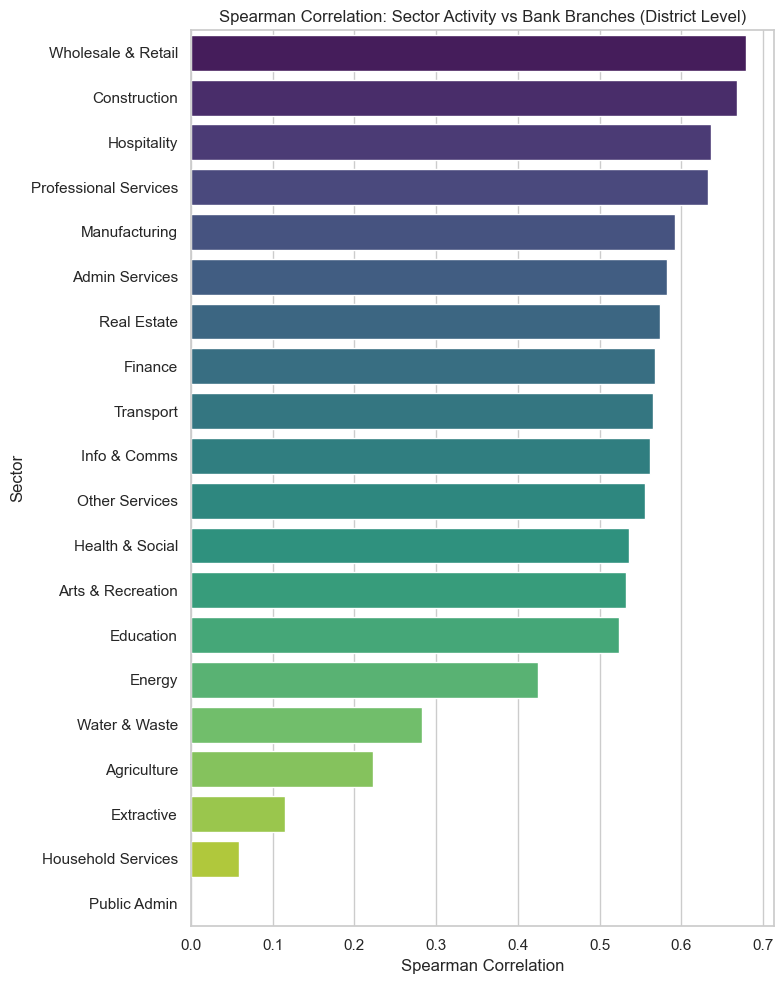

In [912]:
# Create correlation plot 
plt.figure(figsize=(8, 10))
sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
plt.title("Spearman Correlation: Sector Activity vs Bank Branches (District Level)")
plt.xlabel("Spearman Correlation")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

In [913]:
# Include population column and NUM_BRANCHES
required_cols = new_sector_cols + ['NUM_BRANCHES', 'tot_pob', 'DISTRICT']

# Aggregate at district level
aggregated_df = (
    df_merged_model[required_cols]
    .groupby('DISTRICT')
    .sum()
    .reset_index()
)

# Calculate branch density
aggregated_df['branch_density_per_1000'] = (
    aggregated_df['NUM_BRANCHES'] / (aggregated_df['tot_pob'] / 1000)
)

# Generate sector density columns
density_cols = [f"{col}_per_1000" for col in new_sector_cols]
for col in new_sector_cols:
    aggregated_df[f"{col}_per_1000"] = aggregated_df[col] / (aggregated_df['tot_pob'] / 1000)

# Filter out districts with zero companies in all sectors
non_empty = aggregated_df[density_cols].sum(axis=1) > 0
filtered_df = aggregated_df[non_empty].copy()

# Compute Spearman correlation
density_corr = (
    filtered_df[density_cols + ['branch_density_per_1000']]
    .corr(method='spearman')[['branch_density_per_1000']]
    .drop('branch_density_per_1000')
    .sort_values(by='branch_density_per_1000', ascending=False)
)

# Display
print("Spearman Correlation: Company Densities (per 1000 pop) vs Branch Density (Relevant Banks Only)")
print(density_corr)

Spearman Correlation: Company Densities (per 1000 pop) vs Branch Density (Relevant Banks Only)
                                branch_density_per_1000
Education_per_1000                             0.104775
Health & Social_per_1000                       0.100372
Real Estate_per_1000                           0.097466
Wholesale & Retail_per_1000                    0.095986
Other Services_per_1000                        0.095889
Professional Services_per_1000                 0.090790
Finance_per_1000                               0.087346
Arts & Recreation_per_1000                     0.082838
Manufacturing_per_1000                         0.080087
Info & Comms_per_1000                          0.075207
Transport_per_1000                             0.073383
Admin Services_per_1000                        0.067220
Energy_per_1000                                0.056924
Construction_per_1000                          0.054029
Water & Waste_per_1000                         0.051375
Hospitali

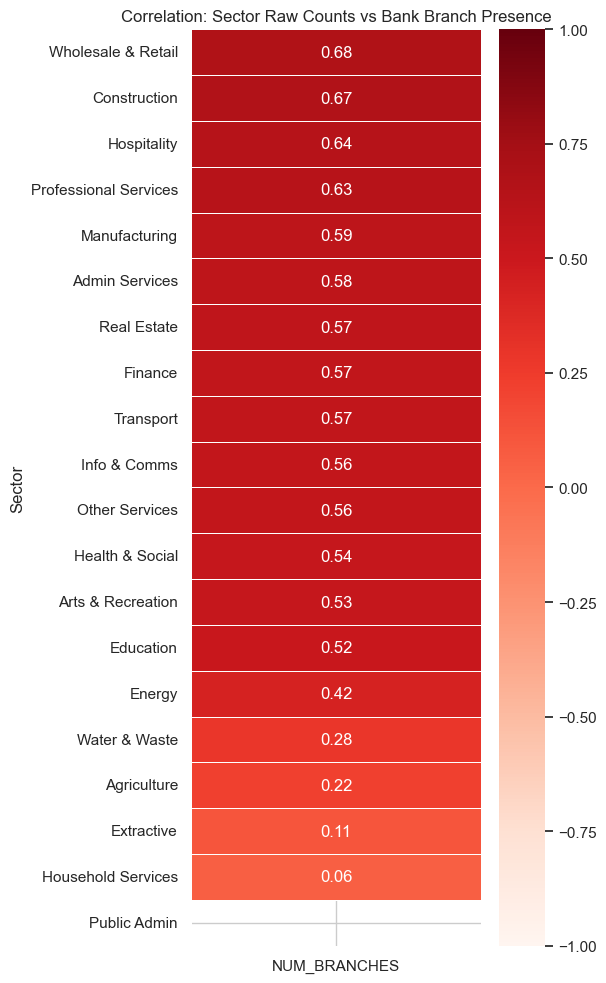

In [914]:
# Plot heatmap
plt.figure(figsize=(6, 10))
sns.heatmap(
    correlations.to_frame(name='NUM_BRANCHES'),
    annot=True, fmt=".2f", cmap='Reds', linewidths=0.5, vmin=-1, vmax=1
)
plt.title("Correlation: Sector Raw Counts vs Bank Branch Presence")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

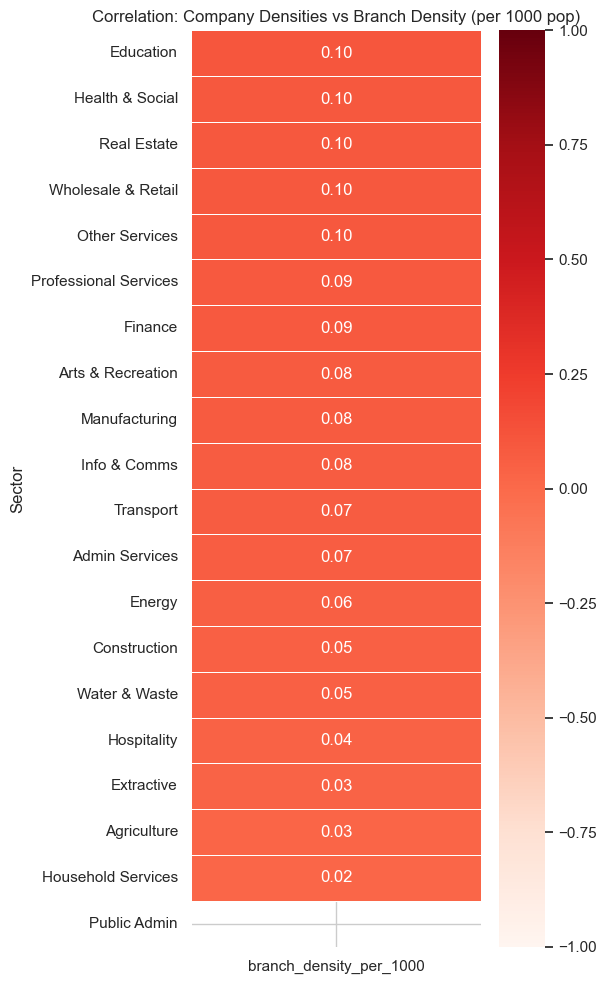

In [915]:
# Clean y-axis labels: remove "_per_1000"
cleaned_index = density_corr.index.str.replace('_per_1000', '', regex=False)
density_corr.index = cleaned_index

# Plot heatmap
plt.figure(figsize=(6, 10))
sns.heatmap(
    density_corr,
    annot=True, fmt=".2f", cmap='Reds',
    linewidths=0.5, vmin=-1, vmax=1
)

# Add labels and layout
plt.title("Correlation: Company Densities vs Branch Density (per 1000 pop)")
plt.ylabel("Sector")
plt.tight_layout()
plt.show()

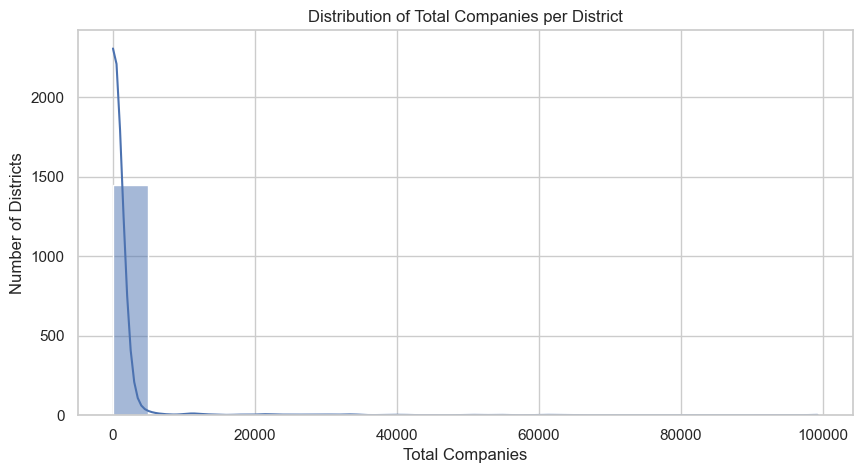

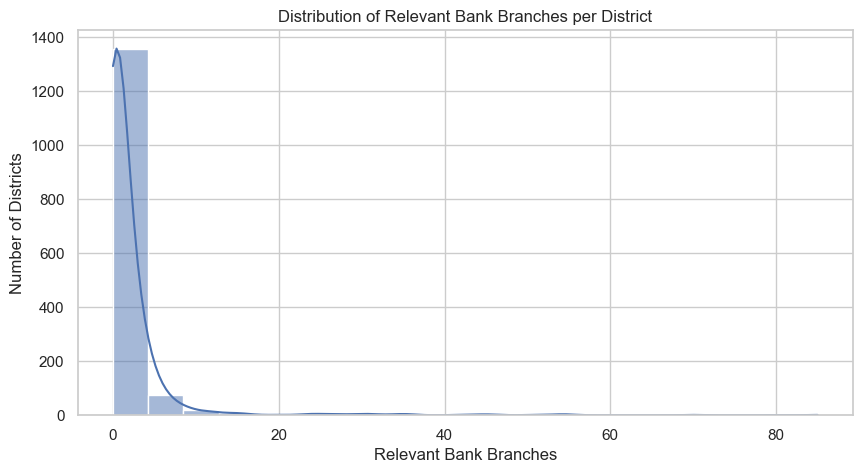

In [916]:
# Set consistent style
sns.set(style="whitegrid")

# Total Companies Histogram (unchanged)
plt.figure(figsize=(10, 5))
sns.histplot(aggregated_df[new_sector_cols].sum(axis=1), bins=20, kde=True)
plt.title("Distribution of Total Companies per District")
plt.xlabel("Total Companies")
plt.ylabel("Number of Districts")
plt.show()

# Relevant Bank Branches Histogram 
# Aggregate NUM_BRANCHES at district level
branches_per_district = (
    df_merged_model.groupby('DISTRICT')['NUM_BRANCHES'].sum().reset_index()
)

# Plot histogram for relevant banks only
plt.figure(figsize=(10, 5))
sns.histplot(branches_per_district['NUM_BRANCHES'], bins=20, kde=True)
plt.title("Distribution of Relevant Bank Branches per District")
plt.xlabel("Relevant Bank Branches")
plt.ylabel("Number of Districts")
plt.show()

## **STEP 6: FEATURE ENGINEERING**
---

#### <b><i> Steps done in this section: </i>


1. Engineer features that best represent the following business goals:
- Affluence & working professionals (retail clients)

- Business presence and strength (for corporate lending)

- Competitor density (to assess opportunity or saturation)



Here, we engineered a set of strategic properties from the merged dataset (`df_merged_model`) to capture the commercial feasibility of each census tract as an expansion site for branches. These properties touch on the business case's top issues: catching affluent people, working professionals, and nice business landscapes and staying away from high competitive saturation. Specifically, we created an **Affluence Score** based on income and housing values, a **Professional Score** to represent working populations in activity, and a series of business indicators like **Business Density**, **Business Growth**, and **Business Strength**, representing the number, momentum, and strength of businesses by location. To adjust for competition in markets, we also included a **Competitor Density Score** that discounts locations with high counts of existing branches of dominant banks. These statistics were combined into a final **Zone Score**, a weighted index to sort and choose the most valuable census tracts for expansion in Madrid and Catalonia.

| Feature Name              | Based On Columns                                         | What It Captures               |
| ------------------------- | -------------------------------------------------------- | ------------------------------ |
| `Affluence_Score`         | `Renta_bruta_media_persona`, `precio_medio_m2`           | Wealth                         |
| `Professional_Score`      | `v_vp25XX` and `v_mp25XX` series, `tasa_paro`            | Employment-age activity        |
| `Business_Density_Score`  | `total_NumCompanies`                                     | B2B presence                   |
| `Business_Growth_Score`   | New creation per sector (`Agriculture`, `Finance`, etc.) | Market growth                  |
| `Business_Strength_Score` | `_Profit`, `_Billing` bins                               | Financial health of businesses |
| `Competitor_Score`        | `NUM_BRANCHES`                                           | Underserved areas              |

#### 6.1

In [917]:
# Create raw features before scaling
working_age_cols = [
    'v_vp2529', 'v_vp3034', 'v_vp3539', 'v_vp4044', 'v_vp4549', 'v_vp5054',
    'v_mp2529', 'v_mp3034', 'v_mp3539', 'v_mp4044', 'v_mp4549', 'v_mp5054'
]
df_merged_model['Working_Age_Pop'] = df_merged_model[working_age_cols].sum(axis=1)


sector_cols = [
    'Agriculture', 'Extractive', 'Manufacturing', 'Energy', 'Water & Waste',
    'Construction', 'Wholesale & Retail', 'Transport', 'Hospitality', 'Info & Comms',
    'Finance', 'Real Estate', 'Professional Services', 'Admin Services',
    'Public Admin', 'Education', 'Health & Social', 'Arts & Recreation',
    'Other Services', 'Household Services'
]
df_merged_model['New_Companies_Total'] = df_merged_model[sector_cols].sum(axis=1)


profit_cols = [
    'Between0And100000_Profit', 'Between100001And500000_Profit',
    'Between500001And1000000_Profit', 'MoreThan1000000_Profit'
]
billing_cols = [
    'Between1And250000_Billing', 'Between250001And500000_Billing',
    'Between500001And1000000_Billing', 'Between1000001And1500000_Billing',
    'Between1500001And2500000_Billing', 'Between2500001And5000000_Billing',
    'Between5000001And25000000_Billing', 'Between25000001And50000000_Billing',
    'MoreThan50000000_Billing'
]
df_merged_model['Profit_Total'] = df_merged_model[profit_cols].sum(axis=1)
df_merged_model['Billing_Total'] = df_merged_model[billing_cols].sum(axis=1)


df_merged_model['Competitor_Score_Raw'] = df_merged_model['NUM_BRANCHES']

In [918]:
# Select raw features for scaling
features_to_scale = [
    'Renta_bruta_media_persona', 'precio_medio_m2',
    'Working_Age_Pop', 'tasa_paro',
    'total_NumCompanies', 'New_Companies_Total',
    'Profit_Total', 'Billing_Total',
    'Competitor_Score_Raw'
]

scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(df_merged_model[features_to_scale])
scaled_df = pd.DataFrame(scaled_array, columns=features_to_scale, index=df_merged_model.index)

In [919]:
# Create engineered features from scaled data 

# Affluence Score = income + housing cost
df_merged_model['Affluence_Score'] = (
    scaled_df['Renta_bruta_media_persona'] +
    scaled_df['precio_medio_m2']
)

# Professional Score = normalized working-age population - normalized unemployment
df_merged_model['Professional_Score'] = (
    scaled_df['Working_Age_Pop'] - scaled_df['tasa_paro']
)

# Other engineered scores
df_merged_model['Business_Density_Score'] = scaled_df['total_NumCompanies']
df_merged_model['Business_Growth_Score'] = scaled_df['New_Companies_Total']
df_merged_model['Business_Strength_Score'] = scaled_df['Profit_Total'] + scaled_df['Billing_Total']
df_merged_model['Competitor_Score'] = 1 - scaled_df['Competitor_Score_Raw']

Side analysis - creating a **Zone Score Calculation** for shortlisting top census tracts

In [920]:
# Compute Zone_Score using weighted business logic (manual inputs for weights)
df_merged_model['Zone_Score'] = (
    0.25 * df_merged_model['Affluence_Score'] +
    0.15 * df_merged_model['Professional_Score'] +
    0.20 * df_merged_model['Business_Density_Score'] +
    0.15 * df_merged_model['Business_Growth_Score'] +
    0.15 * df_merged_model['Business_Strength_Score'] +
    0.10 * df_merged_model['Competitor_Score']
)

In [921]:
# Get top 10 zones per region
top10_cat = df_merged_model[df_merged_model['PROVINCE'] == 'Cataluna'] \
    .nlargest(10, 'Zone_Score')[['CUSEC', 'Zone_Score', 'PROVINCE', 'MUNICIPALITY', 'DISTRICT']]
top10_cat.reset_index(drop=True)

,CUSEC,Zone_Score,PROVINCE,MUNICIPALITY,DISTRICT
0,0801905049,0.821590,Cataluna,Barcelona,08_019_05
1,0801905058,0.819438,Cataluna,Barcelona,08_019_05
2,0801905052,0.819203,Cataluna,Barcelona,08_019_05
3,0801905054,0.816054,Cataluna,Barcelona,08_019_05
4,0801905060,0.813611,Cataluna,Barcelona,08_019_05
5,0801905053,0.804881,Cataluna,Barcelona,08_019_05
6,0801905059,0.795104,Cataluna,Barcelona,08_019_05
7,0801905063,0.787472,Cataluna,Barcelona,08_019_05
8,0801905051,0.785281,Cataluna,Barcelona,08_019_05
9,0801905074,0.770604,Cataluna,Barcelona,08_019_05


In [922]:
top10_mad = df_merged_model[df_merged_model['PROVINCE'] == 'Madrid'] \
    .nlargest(10, 'Zone_Score')[['CUSEC', 'Zone_Score', 'PROVINCE', 'MUNICIPALITY', 'DISTRICT']]
top10_mad.reset_index(drop=True)

,CUSEC,Zone_Score,PROVINCE,MUNICIPALITY,DISTRICT
0,2807904012,1.218554,Madrid,Madrid,28_079_04
1,2807904013,1.217319,Madrid,Madrid,28_079_04
2,2807904003,1.212963,Madrid,Madrid,28_079_04
3,2807904010,1.212819,Madrid,Madrid,28_079_04
4,2807904011,1.202980,Madrid,Madrid,28_079_04
5,2807904002,1.202145,Madrid,Madrid,28_079_04
6,2807904006,1.200413,Madrid,Madrid,28_079_04
7,2807904005,1.199476,Madrid,Madrid,28_079_04
8,2807904009,1.192832,Madrid,Madrid,28_079_04
9,2807904007,1.189831,Madrid,Madrid,28_079_04


## **STEP 7: CREATE MODEL WITH DBSCAN**
---

#### <b><i> Steps done in this section: </i>


1. 

In [923]:
# Final input for DBSCAN
clustering_input = df_merged_model[[
    'Affluence_Score',
    'Professional_Score',
    'Business_Density_Score',
    'Business_Growth_Score',
    'Business_Strength_Score',
    'Competitor_Score'
]]

In [924]:
# DBSCAN hyperparameters
eps_value = 0.3         # Controls the neighborhood size
min_samples_value = 10  # Minimum points to form a dense region

# Run DBSCAN
db = DBSCAN(eps=eps_value, min_samples=min_samples_value)
df_merged_model['dbscan_cluster'] = db.fit_predict(clustering_input)

In [925]:
# Summary of clusters
cluster_counts = df_merged_model['dbscan_cluster'].value_counts().sort_index()
print("Cluster label counts:")
print(cluster_counts)

# Number of noise points (label = -1)
num_noise = (df_merged_model['dbscan_cluster'] == -1).sum()
print(f"\nNumber of noise points (unclustered): {num_noise}")

Cluster label counts:
dbscan_cluster
-1      11
 0    9451
 1      23
 2      38
Name: count, dtype: int64

Number of noise points (unclustered): 11


In [926]:
# Analyze the clusters 
features = [
    'Affluence_Score', 'Professional_Score', 'Business_Density_Score',
    'Business_Growth_Score', 'Business_Strength_Score', 'Competitor_Score'
]

cluster_profiles = df_merged_model.groupby('dbscan_cluster')[features].mean().round(2)
display(cluster_profiles)

,Affluence_Score,Professional_Score,Business_Density_Score,Business_Growth_Score,Business_Strength_Score,Competitor_Score
dbscan_cluster,,,,,,
-1,1.06,-0.02,0.38,0.32,0.99,0.29
0,0.66,-0.10,0.11,0.08,0.31,0.96
1,1.86,-0.12,0.92,1.00,2.00,0.91
2,1.66,-0.13,1.00,0.74,1.79,0.88


After tuning model parameters (eps=0.3, min_samples=10), DBSCAN identified three distinct clusters and a small set of 11 noise points, which were identified as outliers:

The first cluster, representing the vast majority of zones, contains zones of moderate affluence, low business activity, and high competitor saturation. These zones reflect a saturated and less vibrant market and are therefore less important. The second and third clusters, though significantly smaller in size, possess very high affluence, high business activity, lower competition, and high growth potential—making them most attractive for strategic expansion. These two clusters are the most suitable areas where the bank can establish new branches, as they most nearly fit into the target profile of high-income earners, working professionals, and modern businesses. Such data-driven segmentation removes areas of saturation and also pinpoints zones that are not only underserved but also commercially viable.

In [947]:
df_merged_model.head(10)

,CUSEC,tasa_paro,tot_pob,v_varon,v_mujer,v_vp2024,v_vp2529,v_vp3034,v_vp3539,v_vp4044,...,Billing_Total,Competitor_Score_Raw,Affluence_Score,Professional_Score,Business_Density_Score,Business_Growth_Score,Business_Strength_Score,Competitor_Score,Zone_Score,dbscan_cluster
0,0800101001,0.087884,1516,751,765,39,38,45,40,57,...,157.0,2,0.548830,-0.072425,0.027603,0.016796,0.149093,0.714286,0.228176,0
1,0800101002,0.073188,1833,915,918,48,38,49,52,65,...,157.0,1,0.523685,-0.025058,0.027603,0.016796,0.149093,0.857143,0.243281,0
2,0800101003,0.106426,901,443,458,23,12,16,16,35,...,157.0,0,0.666373,-0.152461,0.027603,0.016796,0.149093,1.000000,0.274128,0
3,0800101004,0.086092,1915,986,929,47,32,52,65,127,...,157.0,0,0.596586,-0.025830,0.027603,0.016796,0.149093,1.000000,0.275676,0
4,0800101005,0.078972,1851,922,929,59,36,38,63,70,...,157.0,0,0.531029,-0.035764,0.027603,0.016796,0.149093,1.000000,0.257797,0
5,0800101007,0.084445,2740,1405,1335,62,69,75,89,178,...,157.0,0,0.553082,0.046550,0.027603,0.016796,0.149093,1.000000,0.275657,0
6,0800101008,0.079723,1941,992,949,68,38,49,71,86,...,157.0,0,0.584776,-0.022406,0.027603,0.016796,0.149093,1.000000,0.273237,0
7,0800201001,0.087735,287,154,133,6,6,4,5,13,...,13.0,0,0.685699,-0.154713,0.003410,0.002584,0.012258,1.000000,0.251126,0
8,0800301002,0.052018,2517,1224,1293,67,66,52,76,96,...,114.0,0,0.931717,0.050448,0.038915,0.026486,0.102891,1.000000,0.367686,0
9,0800301003,0.054722,2232,1058,1174,59,41,45,48,79,...,114.0,0,0.924889,0.014241,0.038915,0.026486,0.102891,1.000000,0.360548,0


In [951]:
# Compare with Zone Score Madrid
top10_mad = df_merged_model[df_merged_model['PROVINCE'] == 'Madrid'] \
    .nlargest(10, 'Zone_Score')[['CUSEC', 'DISTRICT', 'Zone_Score']]

# Merge with cluster labels
top10_mad = top10_mad.merge(df_merged_model[['CUSEC', 'dbscan_cluster']], on='CUSEC', how='left')

# Show which clusters the top 10 belong to
print("Top 10 Madrid Zones with Cluster Assignments:")
display(top10_mad)

Top 10 Madrid Zones with Cluster Assignments:


,CUSEC,DISTRICT,Zone_Score,dbscan_cluster
0,2807904012,28_079_04,1.218554,1
1,2807904013,28_079_04,1.217319,1
2,2807904003,28_079_04,1.212963,1
3,2807904010,28_079_04,1.212819,1
4,2807904011,28_079_04,1.202980,1
5,2807904002,28_079_04,1.202145,1
6,2807904006,28_079_04,1.200413,1
7,2807904005,28_079_04,1.199476,1
8,2807904009,28_079_04,1.192832,1
9,2807904007,28_079_04,1.189831,1


In [928]:
# Compare with Zone Score Cataluna
top10_cat = df_merged_model[df_merged_model['PROVINCE'] == 'Cataluna'] \
    .nlargest(10, 'Zone_Score')[['CUSEC', 'Zone_Score']]

# Merge with cluster labels
top10_cat = top10_cat.merge(df_merged_model[['CUSEC', 'dbscan_cluster']], on='CUSEC', how='left')

# Show which clusters the top 10 belong to
print("Top 10 Cataluna Zones with Cluster Assignments:")
display(top10_cat)

Top 10 Cataluna Zones with Cluster Assignments:


,CUSEC,Zone_Score,dbscan_cluster
0,0801905049,0.821590,0
1,0801905058,0.819438,0
2,0801905052,0.819203,0
3,0801905054,0.816054,0
4,0801905060,0.813611,0
5,0801905053,0.804881,0
6,0801905059,0.795104,0
7,0801905063,0.787472,0
8,0801905051,0.785281,0
9,0801905074,0.770604,0


When we compared the top 10 zones in Catalonia with our hand-designed Zone Score and the clusters in DBSCAN, we found complete agreement — all of the shortlisted zones fell under Cluster 1, which we have identified as high-potential zones. High agreement like this attests to both our scoring mechanism and the clustering algorithm and suggests that the selected points are ranked highly by both the manual and data-driven methods at all times.

In [937]:
high_potential = df_merged_model[
    (df_merged_model['dbscan_cluster'].isin([1, 2])) &
    (df_merged_model['PROVINCE'].isin(['Madrid', 'Cataluna']))
]

# Use Zone_Score to rank them
top10_final = high_potential.nlargest(10, 'Zone_Score')[['CUSEC', 'PROVINCE', 'MUNICIPALITY', 'Zone_Score']]
top10_final.reset_index(drop=True)

,CUSEC,PROVINCE,MUNICIPALITY,Zone_Score
0,2807904012,Madrid,Madrid,1.218554
1,2807904013,Madrid,Madrid,1.217319
2,2807904003,Madrid,Madrid,1.212963
3,2807904010,Madrid,Madrid,1.212819
4,2807904011,Madrid,Madrid,1.202980
5,2807904002,Madrid,Madrid,1.202145
6,2807904006,Madrid,Madrid,1.200413
7,2807904005,Madrid,Madrid,1.199476
8,2807904009,Madrid,Madrid,1.192832
9,2807904007,Madrid,Madrid,1.189831


In [931]:
df_merged_model.groupby('PROVINCE')['Zone_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
PROVINCE,,,,,,,,
Cataluna,5091.0,0.292341,0.102632,0.026691,0.219566,0.267387,0.338283,0.821590
Madrid,4432.0,0.372632,0.170819,0.098373,0.256698,0.322279,0.442419,1.218554


Zone Score distribution reveals that Madrid is always behind Cataluna's performance. Not just are Madrid's mean and median scores larger, but even Madrid's best-performing census zones are way ahead of Cataluna's best. This validates the DBSCAN results, which clustered high-potential zones only from within Madrid. Results validate that Madrid today has more business-friendly conditions for new branch openings, and that the model's outputs are not a product of algorithmic bias but indeed reflect actual market realities.

## **STEP 8: MAPS**
---

#### <b><i> Steps done in this section: </i>


1. 

## **STEP 9: FEATURES AND MODEL BASED ON COMPETITOR BANK ANALYSIS**
---

#### <b><i> Steps done in this section: </i>


1. 

## **STEP 10: FINAL CONCLUSIONS**
---